In [1]:
# imporing necessary packages
import pandas as pd
import numpy as np
import sympy.mpmath as math
import matplotlib.pyplot as plt
%matplotlib inline

In [477]:
# Paramertization of the model

rmax = 0.18
kn = 1.4*10**(-2)
qp = 0.05
qz2 = 0.025
b = 0.5
gmax1 = 5
gmax2 = 10
Iv = 1.4*10**(-2)
dep = 20
sp = 3.0*10**(-12)
sz = 1.5*10**(-11)
umax = 1.4*10**(-11)
ks = 0.5
kp1 = 8.5*10**9
kp2 = 7.1*10**15
ss = 0.05

In [478]:
# defining the parameterization equations
def h(t):
    return (7-4*math.cos((2*math.pi/365)*(t+10)))
def dl(t):
    return (12-4*math.cos((2*math.pi/365)*(t+10)))
def r(t):
    return (924.7-400*math.cos((2*math.pi/365)*(t-18964)))
def sr(r, h, dl):
    return r*(h/dl)+(r*0.5*(1-h/dl))

def st(t):
    return 10-2*math.cos((2*math.pi/365)*(t+10))
def sw(t):
    return 0.45+0.25*math.cos((2*math.pi/365)*(t+10))
def M(st, sw):
    return (((1.9/st)**1.95)*(sw/2)**0.51)*2000

def srd(sr, M):
    return sr*math.e**(-0.1*M/2)
def sun(srd):
    return srd/(100+srd)

def cz1(p):
    return p**2/(kp1**2+p**2)
def cz2(p):
    return p**2/(kp2**2+p**2)
def cp(n):
    return n/(kn+n)

def nr(M):
    return (0.42/10)*((M-20)/M)/8
def chk1(M):
    if M <= 20:
        return 0
    else:
        return 1
def chk2(n):
    if n >= 0.42:
        return 0
    else:
        return 1
#def gmax(st):
    #return 0.12*math.e**(0.069*st)
def qz1(st):
    return (2**st)/100000


    

# defining the differential n, p, z equations
def n_prime(cp, sun, nr, chk1, chk2):
  return  -p*sun*umax*cp + nr*chk1*chk2
def p_prime(n, p, z1, z2, cz1, cz2, cp, sun):
  return (p*rmax*cp*sun)-(qp*p)-(gmax1*cz1*z1)-(gmax2*cz2*z2)
def z1_prime(p, z1, cz, qz1):
  return (1-b)*gmax1*cz*z1-qz1*z1
def z2_prime(p, z2, cz, qz2):
  return (1-b)*gmax2*cz*z2-qz2*z2

#initial values
t = 0
t_i = 0.1
p = 1.0*10**7
z1 = 200
z2 = 10
n = 0.42

# Creating an array for the output values differential equation
t_array = []
p_array = []
z1_array = []
z2_array = []
n_array = []

while t <= 400:
  t = t + t_i
  new_n = n_prime(cp(n), sun(srd(sr(r(t), h(t), dl(t)), M(st(t), sw(t)))), nr(M(st(t), sw(t))), chk1(M(st(t), sw(t))), chk2(n))*t_i + n
  new_p = p_prime(n, p, z1, z2, cz1(p), cz2(p), cp(n), sun(srd(sr(r(t), h(t), dl(t)), M(st(t), sw(t)))))*t_i + p
  new_z1 = z1_prime(p, z1, cz1(p), qz1(st(t)))*t_i + z1
  new_z2 = z2_prime(p, z2, cz2(p), qz2)*t_i + z2
  p, z1, z2, n = new_p, new_z1,  new_z2, new_n
  t_array.append(t)
  p_array.append(p)
  z1_array.append(z1)
  z2_array.append(z2)
  n_array.append(n)

output = {'time': t_array, 'phytoplankton': p_array, 'zooplankton_1': z1_array, 'zooplankton_2': z2_array, 'nitrogen': n_array}
print(output)

{'zooplankton_1': [mpf('199.94778785926101'), mpf('199.89556721151084'), mpf('199.84333785317179'), mpf('199.79109958067329'), mpf('199.73885219043652'), mpf('199.68659547887987'), mpf('199.63432924241741'), mpf('199.58205327745731'), mpf('199.52976738040039'), mpf('199.47747134763856'), mpf('199.42516497555326'), mpf('199.37284806051403'), mpf('199.32052039887691'), mpf('199.26818178698301'), mpf('199.21583202115696'), mpf('199.16347089770539'), mpf('199.11109821291549'), mpf('199.05871376305342'), mpf('199.00631734436291'), mpf('198.9539087530637'), mpf('198.90148778535007'), mpf('198.84905423738937'), mpf('198.79660790532051'), mpf('198.7441485852525'), mpf('198.69167607326298'), mpf('198.63919016539668'), mpf('198.58669065766406'), mpf('198.53417734603974'), mpf('198.48165002646104'), mpf('198.42910849482658'), mpf('198.37655254699476'), mpf('198.32398197878234'), mpf('198.271396585963'), mpf('198.2187961642658'), mpf('198.16618050937379'), mpf('198.11354941692258'), mpf('198.06090

In [479]:
output_df = pd.DataFrame(output)
output_df.to_csv('output.csv')

In [480]:
npz_model = pd.read_csv('output.csv', sep=',')
npz_model.head()

,Unnamed: 0,nitrogen,phytoplankton,time,zooplankton_1,zooplankton_2
0,0,0.419999,9967412.950098,0.1,199.947788,9.975000
1,1,0.420373,9934949.587273,0.2,199.895567,9.950062
2,2,0.420371,9902610.054817,0.3,199.843338,9.925187
3,3,0.420370,9870393.494701,0.4,199.791100,9.900374
4,4,0.420369,9838299.551660,0.5,199.738852,9.875623


In [481]:
npz_model['zooplankton'] = npz_model['zooplankton_1']+npz_model['zooplankton_2']
npz_model

,Unnamed: 0,nitrogen,phytoplankton,time,zooplankton_1,zooplankton_2,zooplankton
0,0,0.419999,9967412.950098,0.1,199.947788,9.975000,209.922788
1,1,0.420373,9934949.587273,0.2,199.895567,9.950062,209.845630
2,2,0.420371,9902610.054817,0.3,199.843338,9.925187,209.768525
3,3,0.420370,9870393.494701,0.4,199.791100,9.900374,209.691474
4,4,0.420369,9838299.551660,0.5,199.738852,9.875623,209.614476
5,5,0.420367,9806327.870918,0.6,199.686595,9.850934,209.537530
6,6,0.420366,9774478.098192,0.7,199.634329,9.826307,209.460636
7,7,0.420365,9742749.879698,0.8,199.582053,9.801741,209.383795
8,8,0.420363,9711142.862158,0.9,199.529767,9.777237,209.307004
9,9,0.420362,9679656.692810,1.0,199.477471,9.752794,209.230265


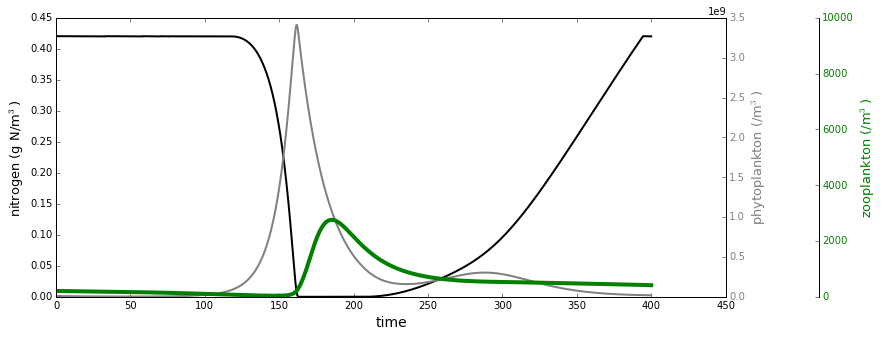

In [482]:
fig = plt.figure(figsize=(12, 5))

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'grey', linewidth=2)
ax3.plot(npz_model.time, npz_model.zooplankton, 'g-', linewidth=4)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel(npz_model.time.name, fontsize=14, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (g N/m$^3$)', fontsize = 13, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (/m$^3$)', fontsize = 13, color='grey')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 13, color='g')

#ax1.set_ylim(0, 2.5)
ax3.set_ylim(0, 10000)
#ax2.set_ylim(0, 1*10**5)

plt.show()

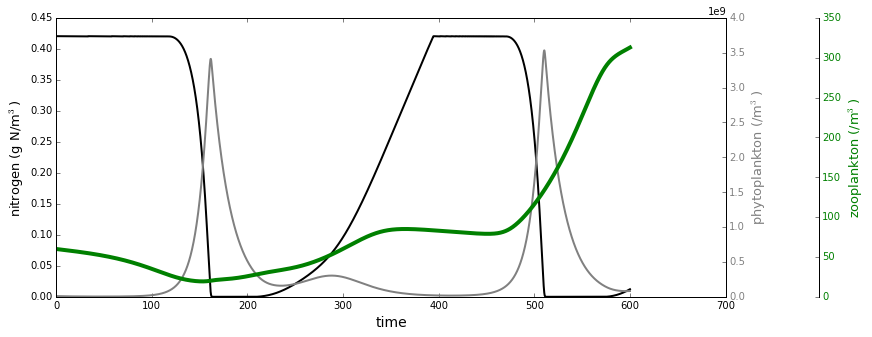

In [358]:
fig = plt.figure(figsize=(12, 5))

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'grey', linewidth=2)
ax3.plot(npz_model.time, npz_model.zooplankton, 'g-', linewidth=4)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel(npz_model.time.name, fontsize=14, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (g N/m$^3$)', fontsize = 13, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (/m$^3$)', fontsize = 13, color='grey')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 13, color='g')

#ax1.set_ylim(0, 2.5)
#ax3.set_ylim(0, 2.5)
#ax2.set_ylim(0, 2.5)

plt.show()

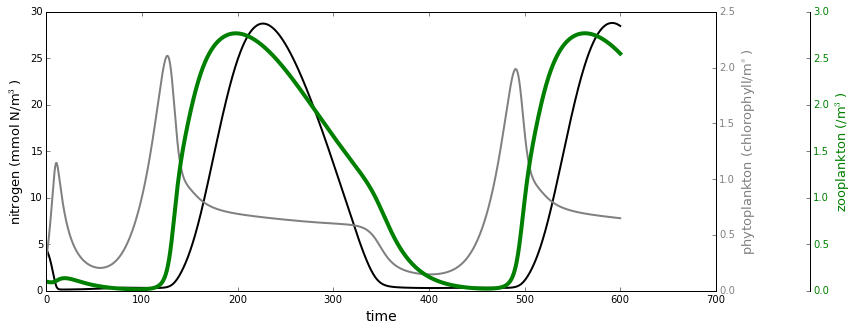

In [141]:
fig = plt.figure(figsize=(12, 5))

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'grey', linewidth=2)
ax3.plot(npz_model.time, npz_model.zooplankton, 'g-', linewidth=4)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel(npz_model.time.name, fontsize=14, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (mmol N/m$^3$)', fontsize = 13, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (chlorophyll/m$^s$)', fontsize = 13, color='grey')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 13, color='g')

#ax3.set_ylim(0,0.9)
#ax2.set_ylim(0, 0.9)

plt.show()

In [106]:
# Paramertization of the model

rmax = 2
kn = 1
qp = 0.1
qz = 0.2
b = 0.7
gmax = 1.5
Iv = 1
dep = 20

In [182]:
def cz(p):
    return gmax*Iv*p*(1-math.e**(-Iv*p))
def cp(n):
    return n/(kn+n)

# defining the differential n, p, z equations
def n_prime(n, p, z):
  return (qp*p) + (qz*z) + b*gmax*Iv*p*(1-math.e**(-Iv*p))*z - n/(kn+n)*p*rmax
def p_prime(n, p, z):
  return (rmax*p*n/(kn+n))-(qp*p)-(gmax*Iv*p*(1-math.e**(-Iv*p))*z)
def z_prime(p, z):
  return (1-b)*gmax*Iv*p*(1-math.e**(-Iv*p))*z-qz*z 

#initial values
t = 0
t_i = 0.1
p = 0.3
z = 0.1
n = 1.6

t_array = []
p_array = []
z_array = []
n_array = []

while t <= 50:
  t = t + t_i
  #new_r = r(p, t)
  #new_cz = cz(p)
  #new_cp = cp(n)
  new_n = n_prime(n, p, z)*t_i + n
  new_p = p_prime(n, p, z)*t_i + p
  new_z = z_prime(p, z)*t_i + z
  p, z, n = new_p, new_z, new_n
  #r, cz, cp = new_r, new_cz, new_cp
  t_array.append(t)
  p_array.append(p)
  z_array.append(z)
  n_array.append(n)

output = {'time': t_array, 'phytoplankton': p_array, 'zooplankton': z_array, 'nitrogen': n_array}
print(output)




{'nitrogen': [mpf('1.5833514018205079'), mpf('1.5658725609267139'), mpf('1.5475350389992166'), mpf('1.5283110681419345'), mpf('1.5081738286995487'), mpf('1.4870977630101572'), mpf('1.4650589278709869'), mpf('1.4420353884205079'), mpf('1.4180076559707957'), mpf('1.3929591720313146'), mpf('1.3668768403152538'), mpf('1.3397516078711744'), mpf('1.3115790955877153'), mpf('1.2823602771213827'), mpf('1.2521022037334395'), mpf('1.2208187705214792'), mpf('1.1885315170199851'), mpf('1.1552704520474766'), mpf('1.1210748889277011'), mpf('1.0859942727575129'), mpf('1.050088976214959'), mpf('1.0134310345299922'), mpf('0.97610478378833143'), mpf('0.93820735992982152'), mpf('0.89984900901134945'), mpf('0.86115315309960505'), mpf('0.82225615134104468'), mpf('0.78330669338098646'), mpf('0.74446476367462933'), mpf('0.70590012184199502'), mpf('0.66779025760881106'), mpf('0.63031780040001106'), mpf('0.5936673941259033'), mpf('0.55802208695075306'), mpf('0.52355933221955242'), mpf('0.49044674673670097'), mp

In [220]:

rmax = 1
kn = 1
qp = 0.2
qz = 0.1
b = 0.7
gmax = 1
Iv = 0.84
dep = 20

In [225]:
# defining the parameterization equations
def r(p, t):
    return (12-4*math.cos((2*math.pi/365)*(t+10)))/24*(10**(-0.1*0.007*p*dep))
def cz(p):
    return gmax*(1-(math.e)**(-Iv*p))
def cp(n):
    return n/(kn+n)
def st(t):
    return 10-2*math.cos((2*math.pi/365)*(t+10))
def sw(t):
    return 0.45-0.15*math.cos((2*math.pi/365)*(t+10))
def M(sw, st):
    return (2.5**(sw*st))/1000


# defining the differential n, p, z equations
def n_prime(n, p, z, cz, cp, r, M):
  return (qp*p) + (qz*z) + b*cz*z - p*rmax*cp + M
def p_prime(n, p, z, r, cz, cp):
  return (p*rmax*cp*r)-(qp*p)-(cz*z)
def z_prime(p, z, cz):
  return (1-b)*cz*z-qz*z 

#initial values
t = 0
t_i = 0.1
p = 0.1
z = 0.3
n = 4.5

# Creating an array for the output values differential equation
t_array = []
p_array = []
z_array = []
n_array = []

while t <= 600:
  t = t + t_i
  new_n = n_prime(n, p, z, cz(p), cp(n), r(p, t), M(sw(t), st(t)))*t_i + n
  new_p = p_prime(n, p, z, r(p, t), cz(p), cp(n))*t_i + p
  new_z = z_prime(p, z, cz(p))*t_i + z
  p, z, n = new_p, new_z, new_n
  t_array.append(t)
  p_array.append(p)
  z_array.append(z)
  n_array.append(n)

output = {'time': t_array, 'phytoplankton': p_array, 'zooplankton': z_array, 'nitrogen': n_array}
print(output)




{'nitrogen': [mpf('4.499434572683505'), mpf('4.4989109157072997'), mpf('4.4984274150651506'), mpf('4.4979825095463166'), mpf('4.4975746889441419'), mpf('4.4972024923257878'), mpf('4.4968645063611703'), mpf('4.496559363709201'), mpf('4.4962857414594657'), mpf('4.4960423596275234'), mpf('4.4958279797020442'), mpf('4.4956414032420557'), mpf('4.4954814705226092'), mpf('4.4953470592272158'), mpf('4.4952370831854616'), mpf('4.4951504911542477'), mpf('4.4950862656411452'), mpf('4.4950434217684068'), mpf('4.4950210061762164'), mpf('4.4950180959638093'), mpf('4.4950337976671237'), mpf('4.4950672462717112'), mpf('4.495117604259649'), mpf('4.4951840606892635'), mpf('4.4952658303064936'), mpf('4.4953621526867762'), mpf('4.4954722914063669'), mpf('4.4955955332420485'), mpf('4.495731187398218'), mpf('4.4958785847603737'), mpf('4.4960370771740648'), mpf('4.49620603674839'), mpf('4.4963848551831749'), mpf('4.4965729431189772'), mpf('4.496769729509114'), mpf('4.4969746610129153'), mpf('4.49718720140945

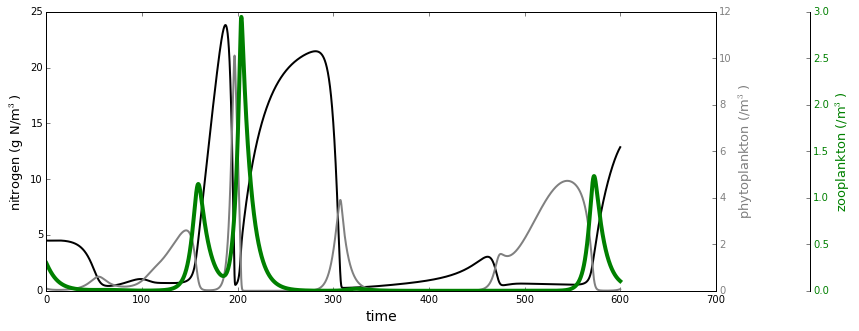

In [228]:
fig = plt.figure(figsize=(12, 5))

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'grey', linewidth=2)
ax3.plot(npz_model.time, npz_model.zooplankton, 'g-', linewidth=4)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel(npz_model.time.name, fontsize=14, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (g N/m$^3$)', fontsize = 13, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (/m$^3$)', fontsize = 13, color='grey')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 13, color='g')

#ax1.set_ylim(0, 2.5)
#ax3.set_ylim(0, 2.5)
#ax2.set_ylim(0, 2.5)

plt.show()

In [243]:
# Paramertization of the model

rmax = 0.18
kn = 1.4*10**(-2)
qp = 0.00005
qz = 0.002
b = 0.7
gmax = 0.0015
gmax2 = 1.0
Iv = 1.4*10**(-2)
dep = 20
sp = 3.0*10**(-12)
sz = 1.5*10**(-11)
umax = 1.4*10**(-11)
ks = 0.5
kp = 1.5*10**8
#kp2 = 8.5*10**9
#ss = 0.05

In [244]:
def h(t):
    return (7-4*math.cos((2*math.pi/365)*(t+10)))
def dl(t):
    return (12-4*math.cos((2*math.pi/365)*(t+10)))
def r(t):
    return (924.7-400*math.cos((2*math.pi/365)*(t-18964)))
def sr(r, h, dl):
    return r*(h/dl)+(r*0.5*(1-h/dl))

def st(t):
    return 10-2*math.cos((2*math.pi/365)*(t+10))
def sw(t):
    return 0.45+0.25*math.cos((2*math.pi/365)*(t+10))
def M(st, sw):
    return (((1.9/st)**1.95)*(sw/2)**0.51)*2000

def srd(sr, M):
    return sr*math.e**(-0.1*M/2)
def sun(srd):
    return srd/(100+srd)


def cz(p):
    return p/(kp+p) #gmax*(1-(math.e)**(-Iv*p))
def cp(n):
    return n/(kn+n)

def nr(M):
    return (0.42/10)*((M-20)/M)
def chk1(M):
    if M <= 20:
        return 0
    else:
        return 1
def chk2(n):
    if n >= 0.42:
        return 0
    else:
        return 1


    

# defining the differential n, p, z equations
def n_prime(cp, sun, nr, chk1, chk2):
  return  -p*sun*umax*cp + nr*chk1*chk2
def p_prime(n, p, z, cz, cp, sun):
  return (p*rmax*cp*sun)-(qp*p)-(gmax*cz*z)
def z_prime(p, z, cz):
  return (1-b)*gmax*cz*z-qz*z 

#initial values
t = 0
t_i = 0.1
p = 1.0*10**7
z = 50
n = 0.42

# Creating an array for the output values differential equation
t_array = []
p_array = []
z_array = []
n_array = []

while t <= 400:
  t = t + t_i
  new_n = n_prime(cp(n), sun(srd(M(st(t), sw(t)), sr(r(t), h(t), dl(t)))), nr(M(st(t), sw(t))), chk1(M(st(t), sw(t))), chk2(n))*t_i + n
  new_p = p_prime(n, p, z, cz(p), cp(n), sun(srd(M(st(t), sw(t)), sr(r(t), h(t), dl(t)))))*t_i + p
  new_z = z_prime(p, z, cz(p))*t_i + z
  p, z, n = new_p, new_z, new_n
  t_array.append(t)
  p_array.append(p)
  z_array.append(z)
  n_array.append(n)

output = {'time': t_array, 'phytoplankton': p_array, 'zooplankton': z_array, 'nitrogen': n_array}
print(output)




{'zooplankton': [49.990140625, mpf('49.980283193486464'), mpf('49.970427705076425'), mpf('49.960574159386987'), mpf('49.950722556035338'), mpf('49.94087289463873'), mpf('49.931025174814501'), mpf('49.921179396180058'), mpf('49.911335558352881'), mpf('49.901493660950536'), mpf('49.891653703590649'), mpf('49.881815685890935'), mpf('49.871979607469179'), mpf('49.862145467943243'), mpf('49.852313266931056'), mpf('49.842483004050635'), mpf('49.832654678920065'), mpf('49.822828291157506'), mpf('49.813003840381199'), mpf('49.803181326209454'), mpf('49.793360748260653'), mpf('49.783542106153263'), mpf('49.773725399505821'), mpf('49.763910627936937'), mpf('49.754097791065306'), mpf('49.744286888509684'), mpf('49.73447791988891'), mpf('49.724670884821897'), mpf('49.714865782927632'), mpf('49.705062613825184'), mpf('49.695261377133683'), mpf('49.685462072472347'), mpf('49.675664699460462'), mpf('49.665869257717397'), mpf('49.656075746862584'), mpf('49.646284166515535'), mpf('49.636494516295841'),

In [245]:
output_df = pd.DataFrame(output)
output_df.to_csv('output.csv')

In [246]:
npz_model = pd.read_csv('output.csv', sep=',')
npz_model.head()

,Unnamed: 0,nitrogen,phytoplankton,time,zooplankton
0,0,0.420000,9999950.000529,0.1,49.990141
1,1,0.423004,9999900.001301,0.2,49.980283
2,2,0.423004,9999850.002315,0.3,49.970428
3,3,0.423004,9999800.003571,0.4,49.960574
4,4,0.423004,9999750.005070,0.5,49.950723


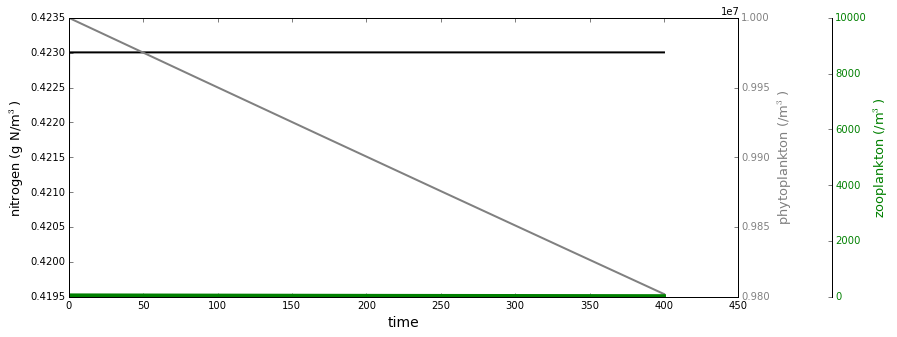

In [247]:
fig = plt.figure(figsize=(12, 5))
][]
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'grey', linewidth=2)
ax3.plot(npz_model.time, npz_model.zooplankton, 'g-', linewidth=4)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel(npz_model.time.name, fontsize=14, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (g N/m$^3$)', fontsize = 13, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (/m$^3$)', fontsize = 13, color='grey')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 13, color='g')

#ax1.set_ylim(0, 2.5)
ax3.set_ylim(0, 10000)
#ax2.set_ylim(0, 1*10**5)

plt.show()

In [248]:
def h(t):
    return (7-4*math.cos((2*math.pi/365)*(t+10)))
def dl(t):
    return (12-4*math.cos((2*math.pi/365)*(t+10)))
def r(t):
    return (924.7-400*math.cos((2*math.pi/365)*(t-18964)))
def sr(r, h, dl):
    return r*(h/dl)+(r*0.5*(1-h/dl))

def st(t):
    return 10-2*math.cos((2*math.pi/365)*(t+10))
def sw(t):
    return 0.45+0.25*math.cos((2*math.pi/365)*(t+10))
def M(st, sw):
    return (((1.9/st)**1.95)*(sw/2)**0.51)*2000

def srd(sr, M):
    return sr*math.e**(-0.1*M/2)
def sun(srd):
    return srd/(100+srd)

In [260]:
t = 200
h(t)
dl(t)
r(t)
sr(r(t), h(t), dl(t))
st(t)
sw(t)
M(st(t), sw(t))
srd(sr(r(t), h(t), dl(t)), M(st(t), sw(t)))
sun(srd(sr(r(t), h(t), dl(t)), M(st(t), sw(t))))



mpf('0.80503316272487213')

In [472]:
# Paramertization of the model

rmax = 0.18
kn = 1.4*10**(-2)
qp = 0.05
qz1 = 0.002
b = 0.7
gmax1 = 0.05
gmax2 = 1.0
Iv = 1.4*10**(-2)
dep = 20
sp = 3.0*10**(-12)
sz = 1.5*10**(-11)
umax = 1.4*10**(-11)
ks = 0.5
kp1 = 1.5*10**8
kp2 = 8.5*10**9
ss = 0.05

# defining the parameterization equations
def h(t):
    return (7-4*math.cos((2*math.pi/365)*(t+10)))
def dl(t):
    return (12-4*math.cos((2*math.pi/365)*(t+10)))
def r(t):
    return (924.7-400*math.cos((2*math.pi/365)*(t-18964)))
def sr(r, h, dl):
    return r*(h/dl)+(r*0.5*(1-h/dl))

def st(t):
    return 10-2*math.cos((2*math.pi/365)*(t+10))
def sw(t):
    return 0.45+0.25*math.cos((2*math.pi/365)*(t+10))
def M(st, sw):
    return (((1.9/st)**1.95)*(sw/2)**0.51)*2000

def srd(sr, M):
    return sr*math.e**(-0.1*M/2)
def sun(srd):
    return srd/(100+srd)

def cz1(p):
    return p**2/(kp1**2+p**2)
def cz2(p):
    return p**2/(kp2**2+p**2)
def cp(n):
    return n/(kn+n)

def nr(M):
    return (0.42/10)*((M-20)/M)/8
def chk1(M):
    if M <= 20:
        return 0
    else:
        return 1
def chk2(n):
    if n >= 0.42:
        return 0
    else:
        return 1
#def gmax(st):
    #return 0.12*math.e**(0.069*st)
def qz2(st):
    return (2**st)/100000


    

# defining the differential n, p, z equations
def n_prime(cp, sun, nr, chk1, chk2):
  return  -p*sun*umax*cp + nr*chk1*chk2
def p_prime(n, p, z1, z2, cz1, cz2, cp, sun):
  return (p*rmax*cp*sun)-(qp*p)-(gmax1*cz1*z1)-(gmax2*cz2*z2)
def z1_prime(p, z1, cz, qz1):
  return (1-b)*gmax1*cz*z1-qz1*z1
def z2_prime(p, z2, cz, qz2):
  return (1-b)*gmax2*cz*z-qz2*z2

#initial values
t = 0
t_i = 0.1
p = 1.0*10**7
z1 = 10
z2 = 10
n = 0.42

# Creating an array for the output values differential equation
t_array = []
p_array = []
z1_array = []
z2_array = []
n_array = []

while t <= 600:
  t = t + t_i
  new_n = n_prime(cp(n), sun(srd(sr(r(t), h(t), dl(t)), M(st(t), sw(t)))), nr(M(st(t), sw(t))), chk1(M(st(t), sw(t))), chk2(n))*t_i + n
  new_p = p_prime(n, p, z1, z2, cz1(p), cz2(p), cp(n), sun(srd(sr(r(t), h(t), dl(t)), M(st(t), sw(t)))))*t_i + p
  new_z1 = z1_prime(p, z1, cz1(p), qz1)*t_i + z1
  new_z2 = z2_prime(p, z2, cz2(p), qz2(st(t)))*t_i + z2
  p, z1, z2, n = new_p, new_z1,  new_z2, new_n
  t_array.append(t)
  p_array.append(p)
  z1_array.append(z1)
  z2_array.append(z2)
  n_array.append(n)

output = {'time': t_array, 'phytoplankton': p_array, 'zooplankton_1': z1_array, 'zooplankton_2': z2_array, 'nitrogen': n_array}
print(output)

{'zooplankton_1': [9.998066371681416, mpf('9.9961326873697054'), mpf('9.9941989502437476'), mpf('9.992265163466552'), mpf('9.9903313301722427'), mpf('9.9883974534728157'), mpf('9.9864635364582757'), mpf('9.984529582196771'), mpf('9.9825955937347324'), mpf('9.9806615740970059'), mpf('9.9787275262869901'), mpf('9.976793453286767'), mpf('9.9748593580572393'), mpf('9.9729252435382598'), mpf('9.9709911126487665'), mpf('9.9690569682869121'), mpf('9.9671228133301994'), mpf('9.9651886506356053'), mpf('9.9632544830397141'), mpf('9.9613203133588488'), mpf('9.9593861443891978'), mpf('9.957451978906942'), mpf('9.9555178196683833'), mpf('9.9535836694100706'), mpf('9.9516495308489272'), mpf('9.9497154066823761'), mpf('9.9477812995884651'), mpf('9.9458472122259902'), mpf('9.9439131472346212'), mpf('9.9419791072350225'), mpf('9.940045094828978'), mpf('9.9381111125995112'), mpf('9.9361771631110063'), mpf('9.9342432489093326'), mpf('9.93230937252196'), mpf('9.9303755364580812'), mpf('9.9284417432087277'

In [473]:
output_df = pd.DataFrame(output)
output_df.to_csv('output.csv')

In [474]:
npz_model = pd.read_csv('output.csv', sep=',')
npz_model.head()

,Unnamed: 0,nitrogen,phytoplankton,time,zooplankton_1,zooplankton_2
0,0,0.419999,9967412.950013,0.1,9.998066,9.997387
1,1,0.420373,9934949.587106,0.2,9.996133,9.994773
2,2,0.420371,9902610.054567,0.3,9.994199,9.992159
3,3,0.420370,9870393.494369,0.4,9.992265,9.989545
4,4,0.420369,9838299.551247,0.5,9.990331,9.986930


In [475]:
npz_model['zooplankton'] = npz_model['zooplankton_1']+npz_model['zooplankton_2']
npz_model.head()

,Unnamed: 0,nitrogen,phytoplankton,time,zooplankton_1,zooplankton_2,zooplankton
0,0,0.419999,9967412.950013,0.1,9.998066,9.997387,19.995453
1,1,0.420373,9934949.587106,0.2,9.996133,9.994773,19.990906
2,2,0.420371,9902610.054567,0.3,9.994199,9.992159,19.986358
3,3,0.420370,9870393.494369,0.4,9.992265,9.989545,19.981810
4,4,0.420369,9838299.551247,0.5,9.990331,9.986930,19.977262


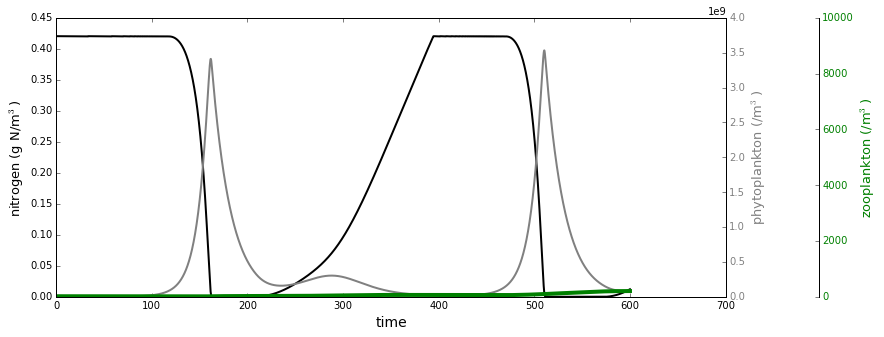

In [476]:
fig = plt.figure(figsize=(12, 5))

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'grey', linewidth=2)
ax3.plot(npz_model.time, npz_model.zooplankton, 'g-', linewidth=4)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel(npz_model.time.name, fontsize=14, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (g N/m$^3$)', fontsize = 13, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (/m$^3$)', fontsize = 13, color='grey')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 13, color='g')

#ax1.set_ylim(0, 2.5)
ax3.set_ylim(0, 10000)
#ax2.set_ylim(0, 1*10**5)

plt.show()